In [1]:
from fastai.data.all import *
from fastai.vision.all import *
from fastai.vision.widgets import ImageClassifierCleaner

%matplotlib inline
%reload_ext autoreload
%autoreload 2

RANDOM_SEED=101

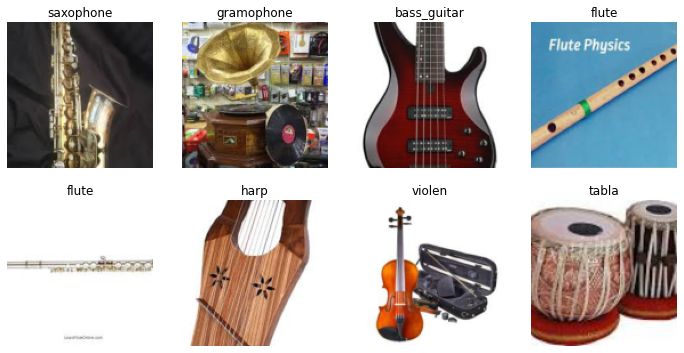

In [2]:

    
instrument_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    item_tfms=Resize(128),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=RANDOM_SEED),
    get_y=parent_label
)
instrument_dl = instrument_datablock.dataloaders(Path('/media/wwymak/Storage/fastbook/custom_data/instruments'))
instrument_dl.valid.show_batch(max_n=8,nrows=2)

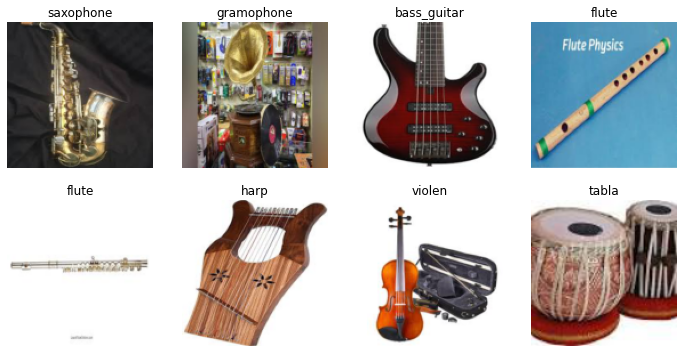

In [3]:
instrument_datablock = instrument_datablock.new(item_tfms=Resize(128, ResizeMethod.Squish))
instrument_dl = instrument_datablock.dataloaders(Path('/media/wwymak/Storage/fastbook/custom_data/instruments'))
instrument_dl.valid.show_batch(max_n=8,nrows=2)

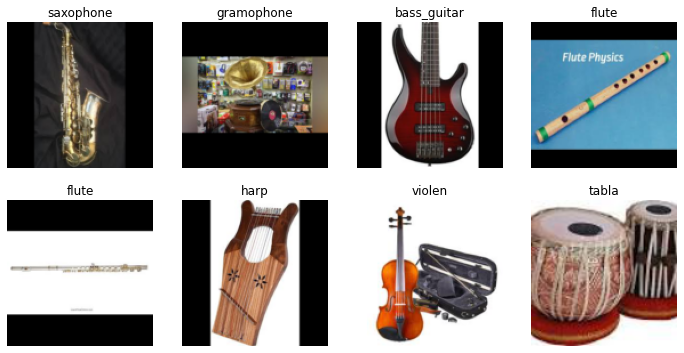

In [4]:
instrument_datablock = instrument_datablock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
instrument_dl = instrument_datablock.dataloaders(Path('/media/wwymak/Storage/fastbook/custom_data/instruments'))
instrument_dl.valid.show_batch(max_n=8,nrows=2)

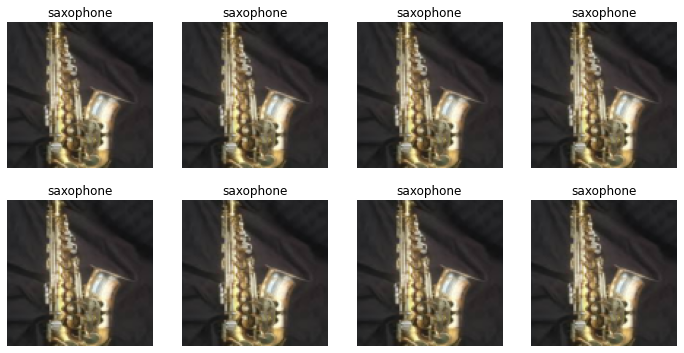

In [5]:
instrument_datablock = instrument_datablock.new(item_tfms=RandomResizedCrop(100, min_scale=0.1))
instrument_dl = instrument_datablock.dataloaders(Path('/media/wwymak/Storage/fastbook/custom_data/instruments'))
instrument_dl.valid.show_batch(max_n=8,nrows=2, unique=True)

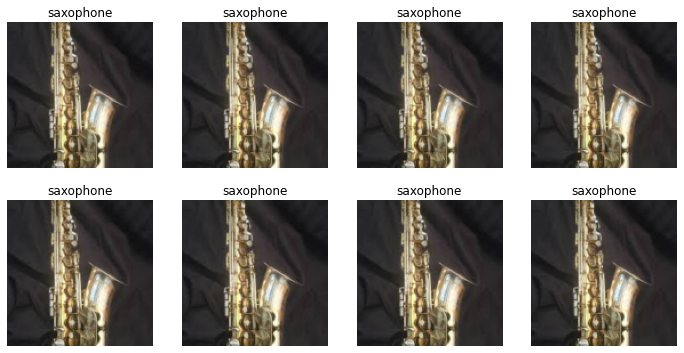

In [6]:
instrument_datablock = instrument_datablock.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
instrument_dl = instrument_datablock.dataloaders(Path('/media/wwymak/Storage/fastbook/custom_data/instruments'))
instrument_dl.valid.show_batch(max_n=8,nrows=2, unique=True)

In [7]:
instrument_datablock = instrument_datablock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
instrument_dl = instrument_datablock.dataloaders(Path('/media/wwymak/Storage/fastbook/custom_data/instruments'))
learn = cnn_learner(instrument_dl, resnet18, metrics=error_rate, model_dir=Path('/media/wwymak/Storage/fastbook/custom_data/models/instruments'))
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.394488,0.141739,0.049844,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.259874,0.090122,0.032710,00:04
1,0.178999,0.104377,0.024922,00:04
2,0.127022,0.080014,0.021807,00:05
3,0.093536,0.081307,0.023364,00:05


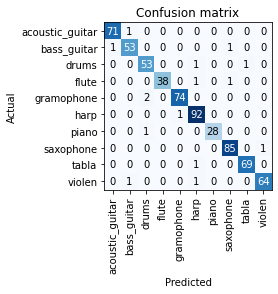

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

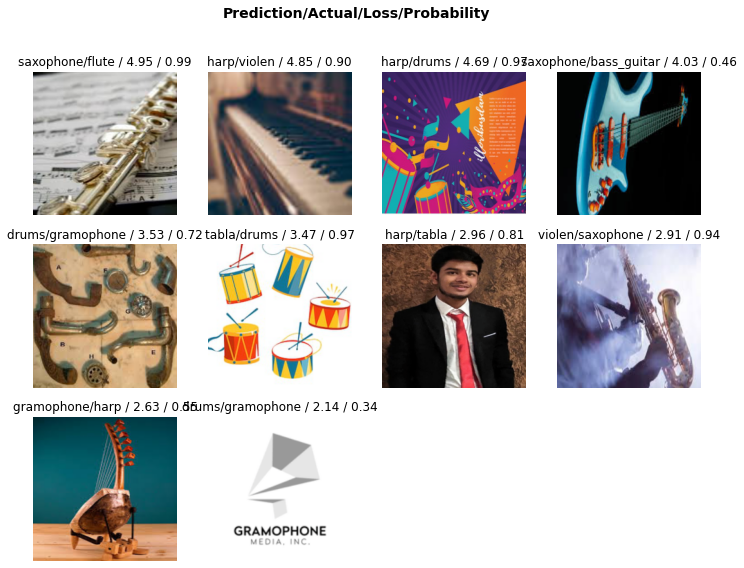

In [9]:
interp.plot_top_losses(10)

In [10]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [12]:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()

In [13]:
for index, category in cleaner.change():
    shutil.move(str(cleaner.fns[idx], Path('/media/wwymak/Storage/fastbook/custom_data/instruments')/category ))

In [16]:
instrument_dl = instrument_datablock.dataloaders(Path('/media/wwymak/Storage/fastbook/custom_data/instruments'))
learn = cnn_learner(instrument_dl, resnet18, metrics=error_rate, model_dir=Path('/media/wwymak/Storage/fastbook/custom_data/models/instruments'))

learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.280837,0.163793,0.056075,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.242594,0.124430,0.031153,00:04
1,0.187642,0.111413,0.028037,00:04
2,0.123807,0.101908,0.024922,00:04
3,0.090732,0.096103,0.023364,00:04


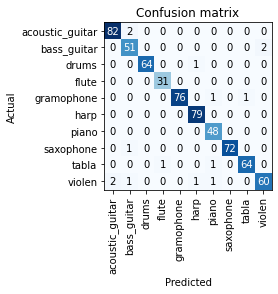

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [19]:
learn.export('/media/wwymak/Storage/fastbook/custom_data/models/instruments/instrument_classifier.pkl')

In [21]:
Path('/media/wwymak/Storage/fastbook/custom_data/models/instruments').ls(file_exts='.pkl')

(#1) [Path('/media/wwymak/Storage/fastbook/custom_data/models/instruments/instrument_classifier.pkl')]